In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
from pylab import savefig
%matplotlib inline

In [2]:
wt_ko = pd.read_csv('WT_KO_counts.txt', sep='\t')
wt_ko.head()

,Gene_id,EKLF+/+ rep1,EKLF+/+ rep2,EKLF+/+ rep3,EKLF-/- rep1,EKLF-/- rep2,EKLF-/- rep3
0,0610005C13Rik,21,15,21,34,19,15
1,0610007C21Rik,177,236,234,297,360,270
2,0610007L01Rik,1504,2035,1576,1651,1592,1608
3,0610007N19Rik,3,1,2,3,2,3
4,0610007P08Rik,518,722,578,612,325,515


In [3]:
genes = wt_ko[wt_ko['Gene_id'].isin(['Hemgn','Snca','Add2','Nxpe2','Sptb'])]
genes

,Gene_id,EKLF+/+ rep1,EKLF+/+ rep2,EKLF+/+ rep3,EKLF-/- rep1,EKLF-/- rep2,EKLF-/- rep3
2486,Add2,4080,5361,4451,705,565,572
10106,Hemgn,6650,8272,8391,6285,4515,5259
19476,Snca,1575,2108,2199,1067,1287,1080


In [4]:
genes.columns=['Gene','EKLF+/+','EKLF+/+','EKLF+/+','EKLF-/-','EKLF-/-','EKLF-/-']
genes

,Gene,EKLF+/+,EKLF+/+,EKLF+/+,EKLF-/-,EKLF-/-,EKLF-/-
2486,Add2,4080,5361,4451,705,565,572
10106,Hemgn,6650,8272,8391,6285,4515,5259
19476,Snca,1575,2108,2199,1067,1287,1080


In [13]:
genes_m = genes.melt(id_vars='Gene')
genes_m.head()

,Gene,variable,value
0,Add2,EKLF+/+,4080
1,Hemgn,EKLF+/+,6650
2,Snca,EKLF+/+,1575
3,Add2,EKLF+/+,5361
4,Hemgn,EKLF+/+,8272


In [14]:
genes_m.columns=['Gene','Sample','FPKM']
genes_m.head()

,Gene,Sample,FPKM
0,Add2,EKLF+/+,4080
1,Hemgn,EKLF+/+,6650
2,Snca,EKLF+/+,1575
3,Add2,EKLF+/+,5361
4,Hemgn,EKLF+/+,8272


In [18]:
def barplots(eklf):
    for gene in eklf:
     ax = sns.barplot(x='Sample',y='FPKM', data=genes_m[genes_m.Gene==gene], ci='sd', capsize=0.2, palette='Set1')
     ax.set_xlabel("")
     ax.set_ylabel("FPKM", fontname="Arial", fontsize=20, weight='bold')
     ax.set_title(gene, fontname="Arial", fontsize=25, weight='bold')
     for tick in ax.get_xticklabels():
      tick.set_fontname("Arial")
     plt.savefig('{s}.png'.format(s=gene), dpi=300, bbox_inches='tight')
     plt.clf()

In [16]:
eklf_markers = genes_m['Gene']

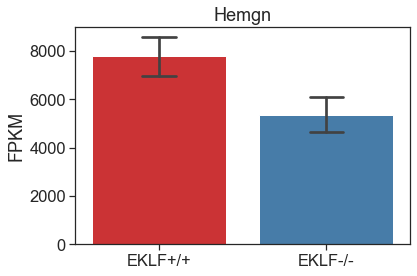

In [10]:
Hemgn_plot = sns.barplot(x='Sample',y='FPKM', data=genes_m[genes_m.Gene == 'Hemgn'], ci = 'sd', capsize = 0.2, palette='Set1')
Hemgn_plot.set(xlabel='', title='Hemgn')
Hemgn_plot.figure.savefig('Hemgn.pdf', dpi=300, bbox_inches='tight')

In [19]:
barplots(eklf_markers)

<Figure size 432x288 with 0 Axes>

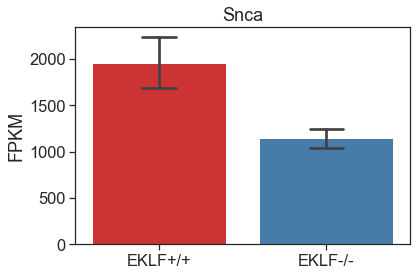

In [11]:
snca_plot = sns.barplot(x='Sample',y='FPKM', data = genes_m[genes_m.Gene == 'Snca'], ci = 'sd', capsize=0.2, palette='Set1')
snca_plot.set(xlabel='', title='Snca')
snca_plot.figure.savefig('Snca.pdf', dpi=300, bbox_inches='tight')

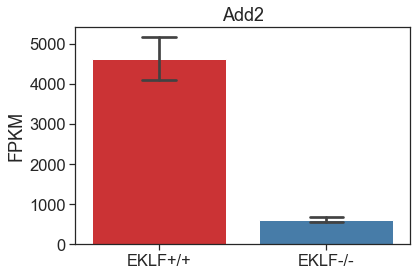

In [12]:
add2_plot = sns.barplot(x='Sample',y='FPKM', data = genes_m[genes_m.Gene == 'Add2'], ci = 'sd', capsize=0.2, palette='Set1')
add2_plot.set(xlabel='', title='Add2')
add2_plot.figure.savefig('Add2.pdf', dpi=300, bbox_inches='tight')

In [14]:
klf1_markers = wt_ko[wt_ko['Gene_id'].isin(["Car2","Hemgn","Gypa","Cited4","Rhd","Snca","Zfpm1", 
"Icam4","Sptb","Spta1","Klf1","Add2","Nxpe2","Samd14","Gata1","Slc38a5"])]
klf1_markers

,Gene_id,EKLF+/+ rep1,EKLF+/+ rep2,EKLF+/+ rep3,EKLF-/- rep1,EKLF-/- rep2,EKLF-/- rep3
2486,Add2,4080,5361,4451,705,565,572
4212,Car2,16084,19310,22216,44511,39921,36644
5016,Cited4,2480,2473,2316,7684,9081,8026
8106,Gata1,2515,3095,2723,3885,3495,3382
9911,Gypa,4880,6014,7622,5772,5104,5394
10106,Hemgn,6650,8272,8391,6285,4515,5259
10526,Icam4,1414,1734,1592,430,465,369
11262,Klf1,3922,4573,4529,845,840,741
17876,Rhd,4146,5103,5363,2827,2756,2501
18405,Samd14,3006,4385,3310,5647,4985,5085


In [15]:
klf1_markers.columns=['Gene','EKLF+/+','EKLF+/+','EKLF+/+','EKLF-/-','EKLF-/-','EKLF-/-']
klf1_markers.head()

,Gene,EKLF+/+,EKLF+/+,EKLF+/+,EKLF-/-,EKLF-/-,EKLF-/-
2486,Add2,4080,5361,4451,705,565,572
4212,Car2,16084,19310,22216,44511,39921,36644
5016,Cited4,2480,2473,2316,7684,9081,8026
8106,Gata1,2515,3095,2723,3885,3495,3382
9911,Gypa,4880,6014,7622,5772,5104,5394


In [17]:
klf1_m = klf1_markers.melt(id_vars='Gene')
klf1_m.head()

,Gene,variable,value
0,Add2,EKLF+/+,4080
1,Car2,EKLF+/+,16084
2,Cited4,EKLF+/+,2480
3,Gata1,EKLF+/+,2515
4,Gypa,EKLF+/+,4880


In [18]:
klf1_m.columns = ['Gene','Sample','FPKM']
klf1_m.head()

,Gene,Sample,FPKM
0,Add2,EKLF+/+,4080
1,Car2,EKLF+/+,16084
2,Cited4,EKLF+/+,2480
3,Gata1,EKLF+/+,2515
4,Gypa,EKLF+/+,4880


In [37]:
klf1_markers.columns = ['Gene','EKLF+/+_1','EKLF+/+_2','EKLF+/+_3','EKLF-/-_1','EKLF-/-_2','EKLF-/-_3']
klf1_markers.head()

,Gene,EKLF+/+_1,EKLF+/+_2,EKLF+/+_3,EKLF-/-_1,EKLF-/-_2,EKLF-/-_3
2486,Add2,4080,5361,4451,705,565,572
4212,Car2,16084,19310,22216,44511,39921,36644
5016,Cited4,2480,2473,2316,7684,9081,8026
8106,Gata1,2515,3095,2723,3885,3495,3382
9911,Gypa,4880,6014,7622,5772,5104,5394


In [4]:
deseq = pd.read_csv('DESeq_up_down.txt', sep='\t')
deseq.head()

,Unnamed: 0,id,baseMean,baseMeanA,baseMeanB,foldChange,log2FoldChange,pval,padj
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NA.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,15,0610010F05Rik,513.036652,632.710471,393.362832,0.621711,-0.685685,0.000198,0.003985
4,16,0610010K14Rik,798.073717,636.221491,959.925943,1.508792,0.593394,0.000771,0.011711


In [5]:
deseq.drop('Unnamed: 0', axis=1, inplace=True)
deseq.head()

,id,baseMean,baseMeanA,baseMeanB,foldChange,log2FoldChange,pval,padj
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0610010F05Rik,513.036652,632.710471,393.362832,0.621711,-0.685685,0.000198,0.003985
4,0610010K14Rik,798.073717,636.221491,959.925943,1.508792,0.593394,0.000771,0.011711


In [6]:
deseq.dropna(inplace=True)
deseq.head()

,id,baseMean,baseMeanA,baseMeanB,foldChange,log2FoldChange,pval,padj
3,0610010F05Rik,513.036652,632.710471,393.362832,0.621711,-0.685685,0.000198,0.003985
4,0610010K14Rik,798.073717,636.221491,959.925943,1.508792,0.593394,0.000771,0.011711
5,0610039K10Rik,325.191762,406.477365,243.906159,0.600049,-0.736849,0.002380,0.027607
6,1110014N23Rik,700.247356,578.820507,821.674205,1.419567,0.505450,0.004965,0.047132
10,1190005F20Rik,596.529056,470.482895,722.575217,1.535816,0.619006,0.000521,0.008586


In [19]:
deseq.shape

(1954, 8)

In [7]:
deseq.to_csv('deseq_up_down.csv')

In [23]:
deseq['-log10padj'] = np.log10(deseq[['padj']])
deseq['-log10padj']*=-1
deseq.head()

,id,baseMean,baseMeanA,baseMeanB,foldChange,log2FoldChange,pval,padj,-log10padj
3,0610010F05Rik,513.036652,632.710471,393.362832,0.621711,-0.685685,0.000198,0.003985,2.399581
4,0610010K14Rik,798.073717,636.221491,959.925943,1.508792,0.593394,0.000771,0.011711,1.931396
5,0610039K10Rik,325.191762,406.477365,243.906159,0.600049,-0.736849,0.002380,0.027607,1.558986
6,1110014N23Rik,700.247356,578.820507,821.674205,1.419567,0.505450,0.004965,0.047132,1.326684
10,1190005F20Rik,596.529056,470.482895,722.575217,1.535816,0.619006,0.000521,0.008586,2.066185


/usr/local/lib/python3.7/site-packages/plotnine/layer.py:452: PlotnineWarning: geom_point : Removed 3 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


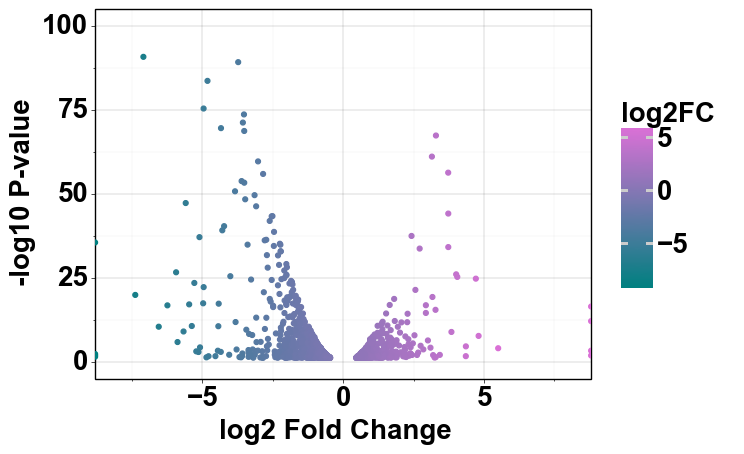

<ggplot: (299567069)>

In [69]:
volcano = ggplot(deseq, aes(x = 'log2FoldChange', y = '-log10padj')) + xlim(-8,8) + ylim(0,100) + geom_point(aes(color = 'log2FoldChange')) + scale_color_gradient('teal','orchid') + theme_linedraw() + theme(text = element_text(family = 'Arial', size = 20, face = 'bold')) + labs(color = 'log2FC') + ylab('-log10 P-value') + xlab('log2 Fold Change')
volcano